## This project is used to predict the signals with numerc digitization using data analysis and artificial intelligence 

### importing liberaries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os
os.getcwd()

'C:\\Users\\dell'

### data balancing

In [3]:
train_data = pd.read_csv('mitbih_train.csv',header = None)

In [4]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
test_data = pd.read_csv('mitbih_test.csv', header = None) 

In [6]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


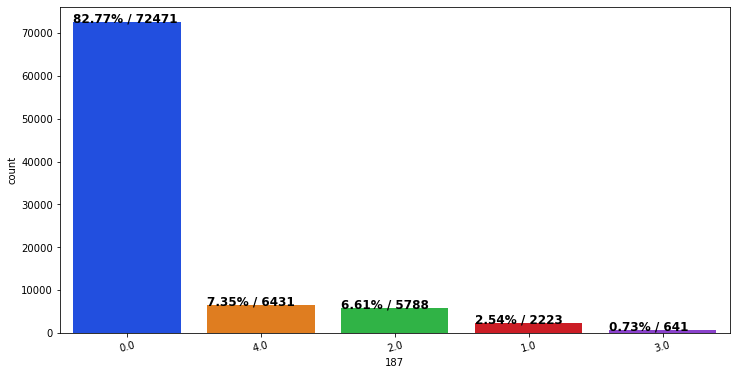

In [7]:
percentages = [count / train_data.shape[0] * 100 for count in train_data[187].value_counts()]

fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(
    x=train_data[187],
    ax=ax,
    palette="bright",
    order=train_data[187].value_counts().index
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=15);

for percentage, count, p in zip(
    percentages,
    train_data[187].value_counts(sort=True).values,
    ax.patches):
    
    percentage = f'{np.round(percentage, 2)}%'
    x = p.get_x() + p.get_width() / 2 - 0.4
    y = p.get_y() + p.get_height()
    ax.annotate(str(percentage)+" / "+str(count), (x, y), fontsize=12, fontweight='bold')
    
plt.savefig('data_dist.png', facecolor='w', edgecolor='w', format='png',
        transparent=False, bbox_inches='tight', pad_inches=0.1)
plt.savefig('data_dist.svg', facecolor='w', edgecolor='w', format='svg',
        transparent=False, bbox_inches='tight', pad_inches=0.1)

###                                                                                                                   موازنة البيانات                                                           

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


In [8]:
train_target = train_data[187].value_counts()

In [9]:
train_target

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64

### the shape of  the data before balancing 

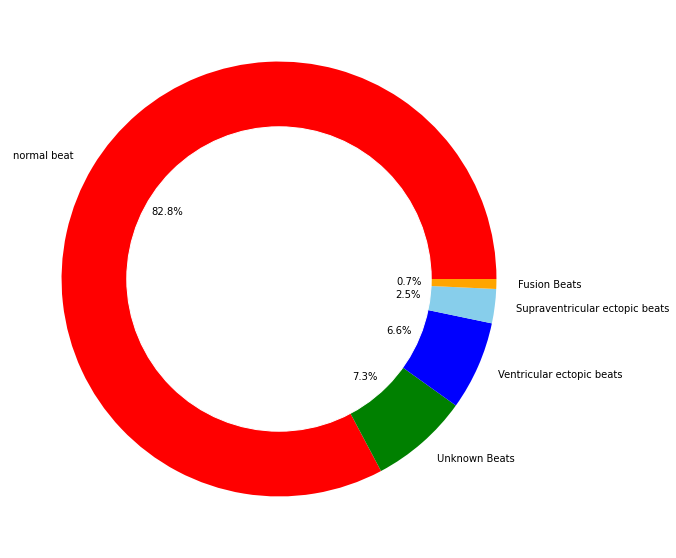

In [10]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(train_target, labels=['normal beat','Unknown Beats','Ventricular ectopic beats','Supraventricular ectopic beats','Fusion Beats'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [11]:
from sklearn.utils import resample
target1=train_data[train_data[187]==1]
target2=train_data[train_data[187]==2]
target3=train_data[train_data[187]==3]
target4=train_data[train_data[187]==4]
target0=(train_data[train_data[187]==0]).sample(n=20000,random_state=42)

target1_sample=resample(target1,replace=True,n_samples=20000,random_state=0)
target2_sample=resample(target2,replace=True,n_samples=20000,random_state=0)
target3_sample=resample(target3,replace=True,n_samples=20000,random_state=0)
target4_sample=resample(target4,replace=True,n_samples=20000,random_state=0)

train_data=pd.concat([target0,target1_sample,target2_sample,target3_sample,target4_sample])


In [12]:
train_target = train_data[187].value_counts()

In [13]:
train_target

0.0    20000
4.0    20000
3.0    20000
1.0    20000
2.0    20000
Name: 187, dtype: int64

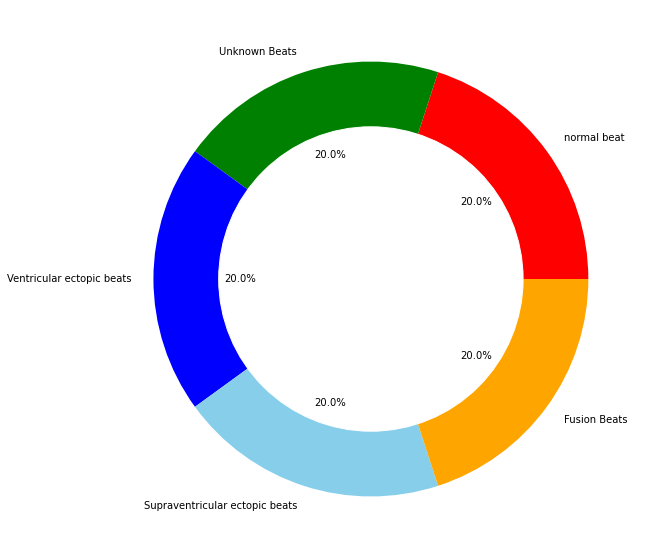

In [14]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(train_target, labels=['normal beat','Unknown Beats','Ventricular ectopic beats','Supraventricular ectopic beats','Fusion Beats'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

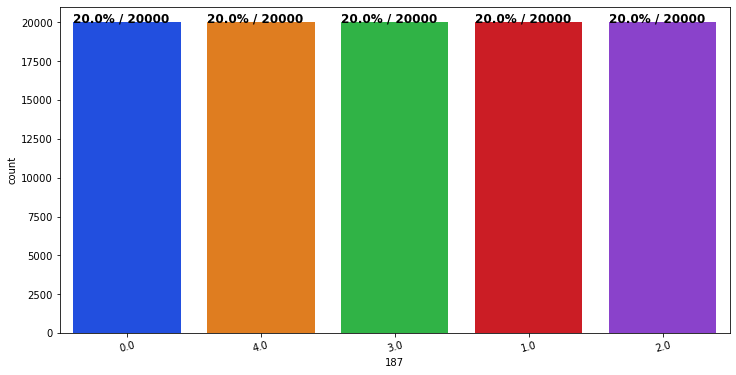

In [129]:
percentages = [count / train_data.shape[0] * 100 for count in train_data[187].value_counts()]

fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(
    x=train_data[187],
    ax=ax,
    palette="bright",
    order=train_data[187].value_counts().index
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=15);

for percentage, count, p in zip(
    percentages,
    train_data[187].value_counts(sort=True).values,
    ax.patches):
    
    percentage = f'{np.round(percentage, 2)}%'
    x = p.get_x() + p.get_width() / 2 - 0.4
    y = p.get_y() + p.get_height()
    ax.annotate(str(percentage)+" / "+str(count), (x, y), fontsize=12, fontweight='bold')
    
plt.savefig('data_dist.png', facecolor='w', edgecolor='w', format='png',
        transparent=False, bbox_inches='tight', pad_inches=0.1)
plt.savefig('data_dist.svg', facecolor='w', edgecolor='w', format='svg',
        transparent=False, bbox_inches='tight', pad_inches=0.1)

## test data balancing

In [69]:
test_target = test_data[187].value_counts()

In [70]:
test_target

0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: 187, dtype: int64

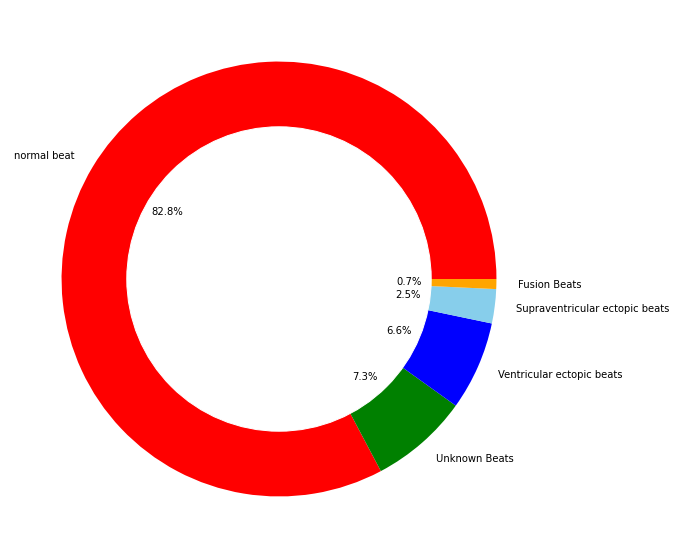

In [71]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(test_target, labels=['normal beat','Unknown Beats','Ventricular ectopic beats','Supraventricular ectopic beats','Fusion Beats'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

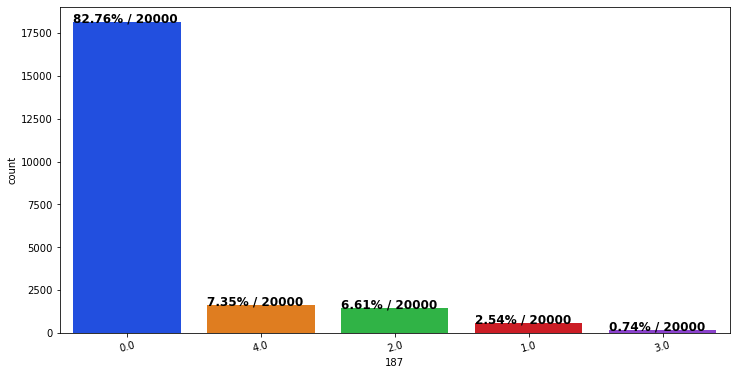

In [73]:
percentages = [count / test_data.shape[0] * 100 for count in test_data[187].value_counts()]

fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(
    x=test_data[187],
    ax=ax,
    palette="bright",
    order=test_data[187].value_counts().index
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=15);

for percentage, count, p in zip(
    percentages,
    train_data[187].value_counts(sort=True).values,
    ax.patches):
    
    percentage = f'{np.round(percentage, 2)}%'
    x = p.get_x() + p.get_width() / 2 - 0.4
    y = p.get_y() + p.get_height()
    ax.annotate(str(percentage)+" / "+str(count), (x, y), fontsize=12, fontweight='bold')
    
plt.savefig('data_dist.png', facecolor='w', edgecolor='w', format='png',
        transparent=False, bbox_inches='tight', pad_inches=0.1)
plt.savefig('data_dist.svg', facecolor='w', edgecolor='w', format='svg',
        transparent=False, bbox_inches='tight', pad_inches=0.1)

In [85]:
from sklearn.utils import resample
target1=test_data[test_data[187]==1]
target2=test_data[test_data[187]==2]
target3=test_data[test_data[187]==3]
target4=test_data[test_data[187]==4]
target0=(test_data[test_data[187]==0]).sample(n=2000,random_state=0)

target1_sample=resample(target1,replace=True,n_samples=2000,random_state=0)
target2_sample=resample(target2,replace=True,n_samples=2000,random_state=0)
target3_sample=resample(target3,replace=True,n_samples=2000,random_state=0)
target4_sample=resample(target4,replace=True,n_samples=2000,random_state=0)

test_data=pd.concat([target0,target1_sample,target2_sample,target3_sample,target4_sample])


In [86]:
test_target = test_data[187].value_counts()

In [87]:
test_target

0.0    2000
4.0    2000
1.0    2000
2.0    2000
3.0    2000
Name: 187, dtype: int64

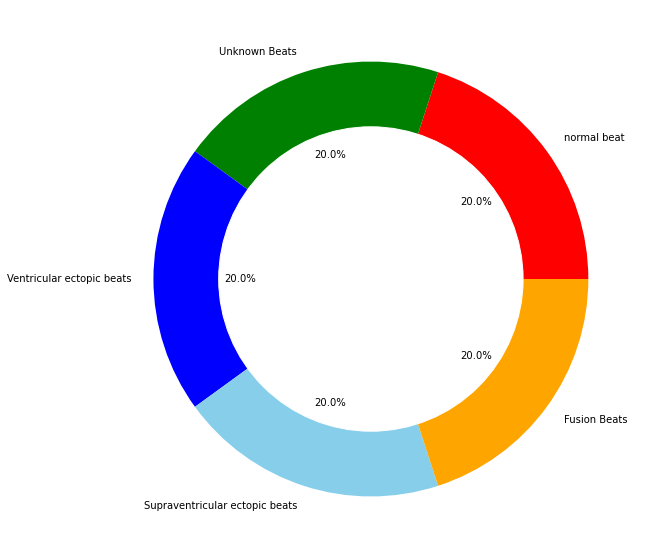

In [88]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(test_target, labels=['normal beat','Unknown Beats','Ventricular ectopic beats','Supraventricular ectopic beats','Fusion Beats'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

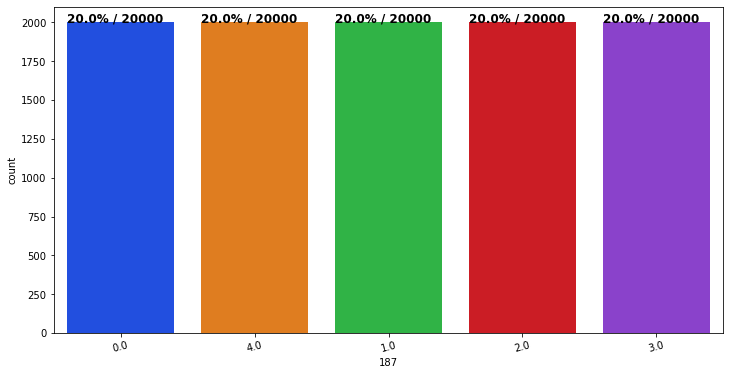

In [89]:
percentages = [count / test_data.shape[0] * 100 for count in test_data[187].value_counts()]

fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(
    x=test_data[187],
    ax=ax,
    palette="bright",
    order=test_data[187].value_counts().index
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=15);

for percentage, count, p in zip(
    percentages,
    train_data[187].value_counts(sort=True).values,
    ax.patches):
    
    percentage = f'{np.round(percentage, 2)}%'
    x = p.get_x() + p.get_width() / 2 - 0.4
    y = p.get_y() + p.get_height()
    ax.annotate(str(percentage)+" / "+str(count), (x, y), fontsize=12, fontweight='bold')
    
plt.savefig('data_dist.png', facecolor='w', edgecolor='w', format='png',
        transparent=False, bbox_inches='tight', pad_inches=0.1)
plt.savefig('data_dist.svg', facecolor='w', edgecolor='w', format='svg',
        transparent=False, bbox_inches='tight', pad_inches=0.1)

## shape of beats

## normal beats

In [15]:
normal = train_data[train_data[187] == 0].index[0]

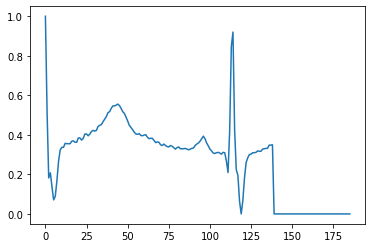

In [16]:
plt.plot(train_data.iloc[normal,:186]);

## Supraventricular ectopic beats shape

In [17]:
Supraventricular = train_data[train_data[187] == 1].index[0]

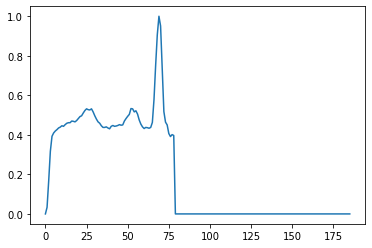

In [18]:
plt.plot(train_data.iloc[Supraventricular,:186]);

## Ventricular ectopic beats

In [19]:
Ventricular = train_data[train_data[187] == 2].index[0]

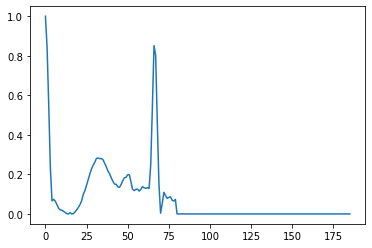

In [20]:
plt.plot(train_data.iloc[Ventricular,:186]);

## Fusion Beats

In [21]:
Fusion = train_data[train_data[187] == 3].index[0]

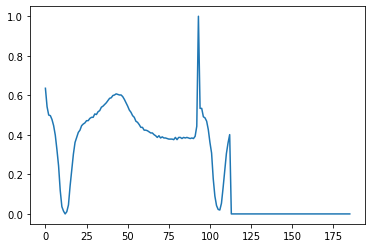

In [22]:
plt.plot(train_data.iloc[Fusion,:186]);

## Unknown Beats

In [23]:
Unknown = train_data[train_data[187] == 4].index[0]

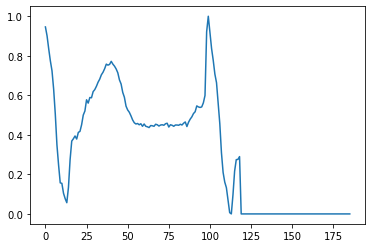

In [24]:
plt.plot(train_data.iloc[Unknown,:186]);

## displaying the all shapes

In [25]:
C0 = train_data.iloc[normal,:186]
C1 = train_data.iloc[Supraventricular,:186]
C2 = train_data.iloc[Ventricular,:186]
C3 = train_data.iloc[Fusion,:186]
C4 = train_data.iloc[Unknown,:186]

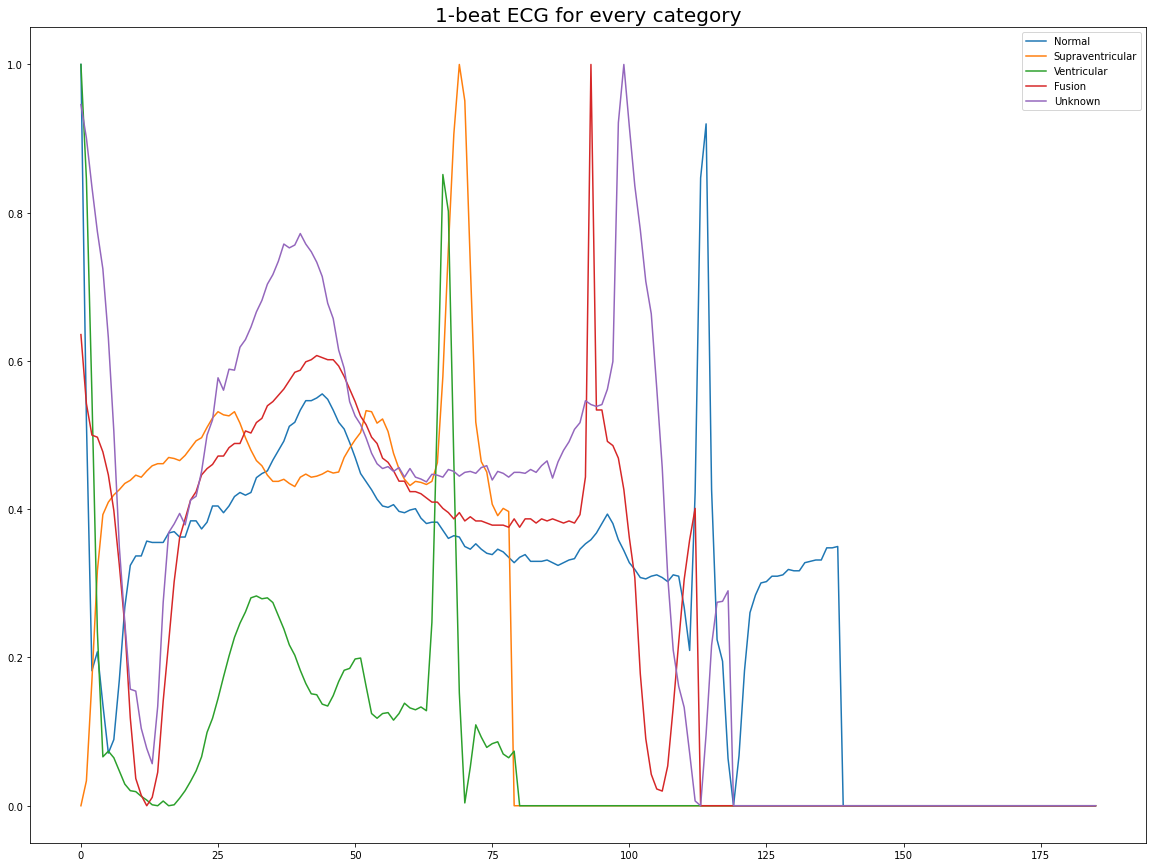

In [26]:
plt.figure(figsize=(20,15))
plt.plot(C0, label="Normal")
plt.plot(C1, label="Supraventricular")
plt.plot(C2, label="Ventricular")
plt.plot(C3, label="Fusion")
plt.plot(C4, label="Unknown")
plt.legend()
plt.title("1-beat ECG for every category", fontsize=20)
plt.show()

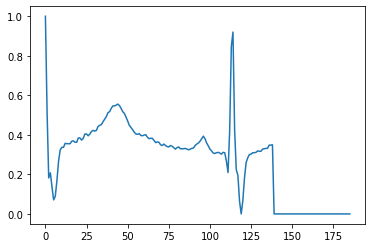

In [90]:
plt.plot(C0)

## Data Preproccessing 

In [91]:
x_train = train_data.iloc[:,0:187]
y_train= train_data.iloc[:,-1]
x_test= test_data.iloc[:,0:187]
y_test= test_data.iloc[:,-1]

## Artificial Neural Networks (ANN MODEL)

In [92]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

model = keras.Sequential([
    layers.BatchNormalization(input_shape=[187]),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'), 
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(5, activation='softmax'),
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy'])


early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=50, # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [93]:
y_train.value_counts()

0.0    20000
4.0    20000
3.0    20000
1.0    20000
2.0    20000
Name: 187, dtype: int64

In [94]:
y_test.value_counts()

0.0    2000
4.0    2000
1.0    2000
2.0    2000
3.0    2000
Name: 187, dtype: int64

In [95]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.python.keras.utils import np_utils
encoder = LabelEncoder()

encoder.fit(y_train)

y_train_enc= encoder.transform(y_train)
y_test_enc= encoder.transform(y_test)

y_train_cat= np_utils.to_categorical(y_train_enc)
y_test_cat= np_utils.to_categorical(y_test_enc)

In [96]:
y_train_f= pd.DataFrame(y_train_cat)
y_train_f.value_counts()

0    1    2    3    4  
0.0  0.0  0.0  0.0  1.0    20000
               1.0  0.0    20000
          1.0  0.0  0.0    20000
     1.0  0.0  0.0  0.0    20000
1.0  0.0  0.0  0.0  0.0    20000
dtype: int64

In [97]:
y_test_f= pd.DataFrame(y_test_cat)
y_test_f.value_counts()

0    1    2    3    4  
0.0  0.0  0.0  0.0  1.0    2000
               1.0  0.0    2000
          1.0  0.0  0.0    2000
     1.0  0.0  0.0  0.0    2000
1.0  0.0  0.0  0.0  0.0    2000
dtype: int64

In [143]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

model = keras.Sequential([
    layers.BatchNormalization(input_shape=[187]),
    layers.Dense(50, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(50, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(5, activation='softmax'),
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy'])


model.fit(x_train, y_train_f, epochs=100)


Epoch 1/113
3125/3125 [==============================] - 9s 3ms/step - loss: 0.6883 - accuracy: 0.7479: 0s - loss: 0.6917 - accura
Epoch 2/113
3125/3125 [==============================] - 8s 3ms/step - loss: 0.5186 - accuracy: 0.8123
Epoch 3/113
3125/3125 [==============================] - 5s 2ms/step - loss: 0.4752 - accuracy: 0.8286
Epoch 4/113
3125/3125 [==============================] - 6s 2ms/step - loss: 0.4549 - accuracy: 0.8356
Epoch 5/113
3125/3125 [==============================] - 6s 2ms/step - loss: 0.4391 - accuracy: 0.8406
Epoch 6/113
3125/3125 [==============================] - 6s 2ms/step - loss: 0.4297 - accuracy: 0.8455: 0s - loss: 0.4301 
Epoch 7/113
3125/3125 [==============================] - 10s 3ms/step - loss: 0.4252 - accuracy: 0.8474
Epoch 8/113
3125/3125 [==============================] - 10s 3ms/step - loss: 0.4214 - accuracy: 0.8484
Epoch 9/113
3125/3125 [==============================] - 8s 2ms/step - loss: 0.4114 - accuracy: 0.8521
Epoch 10/113
3125/3125 

In [144]:
testy = to_categorical(y_test)
print("Evaluation: ")
mse, acc = model.evaluate(x_test, testy)
print('mean_squared_error :', mse)
print('accuracy:', acc)

Evaluation: 
313/313 [==============================] - 1s 2ms/step - loss: 0.2978 - accuracy: 0.8969
mean_squared_error : 0.2977598011493683
accuracy: 0.8968999981880188


In [98]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

model = keras.Sequential([
    layers.BatchNormalization(input_shape=[187]),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(5, activation='softmax'),
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy'])


early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=50, # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [99]:
history = model.fit(
    x_train, y_train_f,
    validation_data=(x_test, y_test_f),
    batch_size=3000,
    epochs=250,
    callbacks=[early_stopping],
    verbose=0,  
)

history_df = pd.DataFrame(history.history)

Best Validation Loss: 0.3007
Best Validation Accuracy: 0.9268


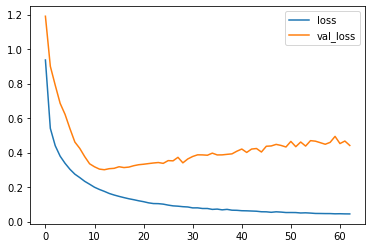

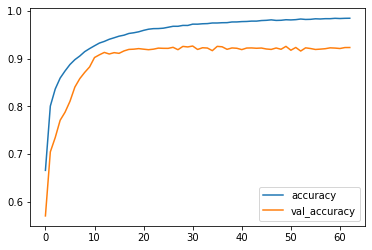

In [100]:
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_accuracy'].max()))

In [101]:
y_preds = model.predict(x_test)
rounded_y = np.round(y_preds)


In [102]:
y_test_fn = np.array(y_test_f)

In [103]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [104]:
cm = confusion_matrix(np.argmax(y_test_fn, axis = 1), np.argmax(rounded_y, axis = 1))

In [105]:
cm

array([[1741,  159,   28,   60,   12],
       [ 215, 1721,   23,   30,   11],
       [  64,   20, 1849,   59,    8],
       [  80,   27,   51, 1842,    0],
       [  12,   13,    9,    0, 1966]], dtype=int64)

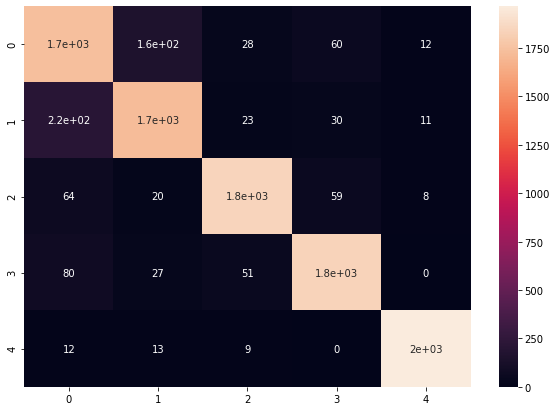

In [106]:
cm = pd.DataFrame(cm)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True);

## prediction of ecg arduiono sample

In [107]:
dr = pd.read_csv('data1.csv',header = None)

In [108]:
dr.head()

,0
0,1023
1,1019
2,1023
3,1019
4,1023


In [109]:
sample = pd.DataFrame(dr.iloc[45600:45787,0],index = None)

In [110]:
sample.head()

,0
45600,826
45601,836
45602,825
45603,828
45604,828


In [111]:
horizontal_row = sample.T

In [112]:
horizontal_row

,45600,45601,45602,45603,45604,45605,45606,45607,45608,45609,...,45777,45778,45779,45780,45781,45782,45783,45784,45785,45786
0,826,836,825,828,828,822,822,823,816,813,...,812,810,798,818,803,815,813,812,812,810


In [113]:
horizontal_row.shape

(1, 187)

we normalize the data in order to fast implementation

In [114]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()

In [115]:
data = np.round(norm.fit_transform(horizontal_row),6)

In [116]:
data

array([[0.074307, 0.075206, 0.074217, 0.074487, 0.074487, 0.073947,
        0.073947, 0.074037, 0.073407, 0.073137, 0.072777, 0.073227,
        0.073227, 0.072507, 0.072867, 0.072238, 0.072148, 0.072597,
        0.072777, 0.073047, 0.073047, 0.072867, 0.071878, 0.073407,
        0.071788, 0.073137, 0.072777, 0.073047, 0.073767, 0.072597,
        0.071878, 0.073407, 0.072507, 0.073047, 0.072777, 0.073227,
        0.073227, 0.073407, 0.072148, 0.072597, 0.072507, 0.073047,
        0.072238, 0.073137, 0.073137, 0.072148, 0.072597, 0.072867,
        0.072507, 0.073047, 0.072957, 0.072597, 0.073767, 0.072238,
        0.072507, 0.072597, 0.072867, 0.073047, 0.072687, 0.073047,
        0.072507, 0.072867, 0.072867, 0.072148, 0.073047, 0.072777,
        0.072507, 0.073047, 0.072507, 0.071878, 0.072597, 0.072507,
        0.072597, 0.073137, 0.073227, 0.073227, 0.072597, 0.072238,
        0.072867, 0.072867, 0.073047, 0.072777, 0.073767, 0.073047,
        0.073587, 0.072957, 0.073587, 0.073407, 

In [117]:
y_pred = model.predict(data)

In [118]:
y = np.round(y_pred)

In [119]:
c = pd.DataFrame(y, index = None)

In [120]:
c[0]

0    0.0
Name: 0, dtype: float32

In [121]:
l = list(c)

In [122]:
l

[0, 1, 2, 3, 4]

In [123]:
if l[0] == 1:
    print('0')
elif l[1] == 1:
    print('1')
elif l[2] == 1:
    print('2')
elif l[3] == 1:
    print('3')
elif l[3] == 1:
    print('4')
    

1


In [124]:
import joblib

In [125]:
model_json = model.to_json()

In [126]:
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [127]:
os.getcwd()

'C:\\Users\\dell'

In [128]:
joblib.dump(norm, 'scaller.h5')

['scaller.h5']